In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.models import Sequential

In [2]:
current_location = os.getcwd()
data_location = "data/"

# read the data

In [3]:
fopen = open(data_location + "pattern.txt", "r")
patterns = fopen.read()
fopen.close()

In [4]:
patterns = patterns.split("\n")
patterns = patterns[:len(patterns) - 1]

In [5]:
patterns_final = []
for k in range(len(patterns)):
    if len(patterns[k]) == 10:
        patterns_final.append(patterns[k].upper())
        
print ("Given patterns :", len(patterns_final))

Given patterns : 82


In [6]:
data_prep = []
for k in range(len(patterns_final)):
    one = []
    for m in range(len(patterns_final[k])):
        one.append(ord(patterns_final[k][m]) - ord('A') + 1)
    data_prep.append(one)

In [7]:
print (data_prep[9], patterns_final[9])

[1, 2, 3, 3, 1, 2, 2, 3, 1, 2] ABCCABBCAB


# data in training format
## model-1 : target will only 1

In [8]:
input_ = []
target_ = []

input_size = 5

for k in range(len(data_prep)):
    for m in range(10 - input_size):
        input_.append(data_prep[k][m:input_size + m])
        target_.append(data_prep[k][input_size + m])

In [9]:
target = []

for k in range(len(target_)):
    a = [0] * 3
    a[target_[k] - 1] = 1
    target.append(a)

In [10]:
print (input_[0], target[0])
print (len(input_))

[1, 3, 2, 2, 3] [0, 0, 1]
410


In [11]:
trainX = input_[:int(len(input_) * 0.6)]
trainY = target[:int(len(target) * 0.6)]

validateX = input_[int(len(input_) * 0.6) : int(len(input_) * 0.8)]
validateY = target[int(len(target) * 0.6) : int(len(target) * 0.8)]

testX = input_[int(len(input_) * 0.8):]
testY = target[int(len(target) * 0.8):]

trainX = np.array(trainX)
trainY = np.array(trainY)
validateX = np.array(validateX)
validateY = np.array(validateY)
testX = np.array(testX)
testY = np.array(testY)

In [12]:
print (trainX[0], trainY[0], input_[0])

[1 3 2 2 3] [0 0 1] [1, 3, 2, 2, 3]


In [36]:
model = Sequential()

model.add(Dense(len(trainX[0]), input_dim = len(trainX[0]), activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(3, activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(trainX, trainY, epochs=100, batch_size=50, verbose=1, validation_data = (validateX, validateY), shuffle = True)

Train on 246 samples, validate on 82 samples
Epoch 1/100
246/246 [==============================] - 1s 3ms/step - loss: 1.0990 - acc: 0.3211 - val_loss: 1.0978 - val_acc: 0.3171
Epoch 2/100
246/246 [==============================] - 0s 135us/step - loss: 1.0973 - acc: 0.3659 - val_loss: 1.0962 - val_acc: 0.5122
Epoch 3/100
246/246 [==============================] - 0s 232us/step - loss: 1.0963 - acc: 0.4024 - val_loss: 1.0945 - val_acc: 0.4756
Epoch 4/100
246/246 [==============================] - 0s 160us/step - loss: 1.0948 - acc: 0.3862 - val_loss: 1.0927 - val_acc: 0.4634
Epoch 5/100
246/246 [==============================] - 0s 129us/step - loss: 1.0935 - acc: 0.4024 - val_loss: 1.0912 - val_acc: 0.4878
Epoch 6/100
246/246 [==============================] - 0s 112us/step - loss: 1.0919 - acc: 0.4024 - val_loss: 1.0899 - val_acc: 0.4878
Epoch 7/100
246/246 [==============================] - 0s 188us/step - loss: 1.0903 - acc: 0.4228 - val_loss: 1.0886 - val_acc: 0.5000
Epoch 8/100


246/246 [==============================] - 0s 167us/step - loss: 0.9398 - acc: 0.5447 - val_loss: 0.9338 - val_acc: 0.6463
Epoch 62/100
246/246 [==============================] - 0s 115us/step - loss: 0.9404 - acc: 0.5447 - val_loss: 0.9335 - val_acc: 0.6463
Epoch 63/100
246/246 [==============================] - 0s 158us/step - loss: 0.9407 - acc: 0.5285 - val_loss: 0.9280 - val_acc: 0.6220
Epoch 64/100
246/246 [==============================] - 0s 100us/step - loss: 0.9391 - acc: 0.5203 - val_loss: 0.9294 - val_acc: 0.6341
Epoch 65/100
246/246 [==============================] - 0s 120us/step - loss: 0.9377 - acc: 0.5407 - val_loss: 0.9295 - val_acc: 0.6341
Epoch 66/100
246/246 [==============================] - 0s 125us/step - loss: 0.9357 - acc: 0.5447 - val_loss: 0.9304 - val_acc: 0.6463
Epoch 67/100
246/246 [==============================] - 0s 85us/step - loss: 0.9357 - acc: 0.5407 - val_loss: 0.9282 - val_acc: 0.6463
Epoch 68/100
246/246 [==============================] - 0s 117

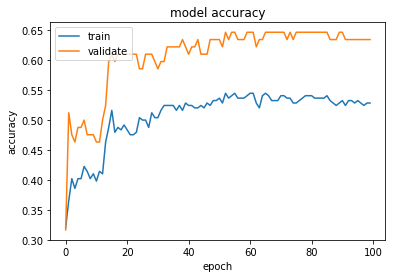

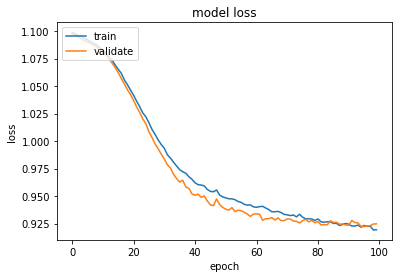

In [39]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [40]:
scores_train = model.evaluate(trainX, trainY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(validateX, validateY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(testX, testY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

246/246 [==============================] - 0s 107us/step
Train acc: 52.85%
82/82 [==============================] - 0s 128us/step
Train acc: 63.41%
82/82 [==============================] - 0s 140us/step
Train acc: 51.22%


In [41]:
predictions = model.predict(testX)
for k in range(len(testX)):
    a = [0]*3
    maxx = max(predictions[k])
    pos = 0
    for m in range(len(predictions[k])):
        if predictions[k][m] == maxx:
            pos = m
            break
    a[pos] = 1
    #print (predictions[k], " : ",  a, " : ",testY[k])
    print (a, " : ", list(testY[k]))

[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 1, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 0, 1]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 1, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 1, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0

In [42]:
sequence = ['A', 'C', 'A', 'B', 'C']

sqd = []
for k in range(len(sequence)):
    sqd.append(ord(sequence[k]) - ord('A') + 1)

predictions = model.predict(np.array([sqd])) 

a = [0]*3
maxx = max(predictions[0])
pos = 0
for m in range(len(predictions[0])):
    if predictions[0][m] == maxx:
        pos = m
        break
a[pos] = 1

print (sqd, a)

if a[0] == 1:
    print ('A')
elif a[1] == 1:
    print ('B')
else:
    print ('C')

[1, 3, 1, 2, 3] [1, 0, 0]
A


In [43]:
model_json = model.to_json()
with open("model/model_6th.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/model_6th.h5")
print("Saved model to disk")

Saved model to disk


In [45]:
from keras.models import model_from_json
import numpy as np

json_file_6 = open('model/model_6th.json', 'r')
loaded_model_json_6 = json_file_6.read()
json_file_6.close()
loaded_model_6 = model_from_json(loaded_model_json_6)
loaded_model_6.load_weights("model/model_6th.h5")
print("Loaded model for 6th prediction from disk")

data_num = [1, 2, 3, 1, 2]

predictions = loaded_model_6.predict(np.array([data_num]))

Loaded model for 6th prediction from disk


In [46]:
predictions

array([[0.17870674, 0.26481786, 0.5564754 ]], dtype=float32)